# 코로나시대 해수욕장 안전하게 즐기기

# 목차
 -주제 선정 이유
 
 -사용 데이터
 
 -코로나 확진자
 
 -동해안 톨게이트 위치 & 교통량
 
 -결론

# 주제 선정 이유
동해안 코로나 확진자 급증으로 안전한 피서를 즐기기 
위한 방안마련 및 겨울철 안전한 여행 대비하기 위함

# 사용 데이터
데이콘 데이터

-https://data.molit.go.kr/data-set/search/detail/7069824# 

-https://www.data.go.kr/data/15085319/fileData.do

# 강원도 코로나 확진

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
test = pd.read_csv("corona.csv")

In [4]:
print(pd.DataFrame(test).shape)

(18, 19)


In [5]:
test.head()

,date,Cheorwon,Chuncheon,Donghae,Gangneung,Gosung,Hoengseong,Hongcheon,Hwacheon,Injae,jungsun,Pyeongchang,Samcheok,Sokcho,Taebaek,Wonju,Yanggu,Yangyang,Yeongwol
0,20-2,0,2,0,1,0,0,0,0,0,0,0,1,2,0,2,0,0,0
1,20-3,1,3,0,7,0,1,0,0,1,0,0,0,1,1,15,0,0,0
2,20-4,8,2,0,1,0,0,0,0,0,0,0,0,0,0,2,0,1,1
3,20-5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0
4,20-6,1,3,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0


In [6]:
test.tail()

,date,Cheorwon,Chuncheon,Donghae,Gangneung,Gosung,Hoengseong,Hongcheon,Hwacheon,Injae,jungsun,Pyeongchang,Samcheok,Sokcho,Taebaek,Wonju,Yanggu,Yangyang,Yeongwol
13,21-3,4,28,72,27,12,1,24,2,2,8,86,6,121,2,69,0,13,4
14,21-4,3,24,18,85,3,16,22,1,3,6,24,2,12,0,99,0,17,3
15,21-5,32,0,31,158,1,1,35,0,5,2,27,4,13,18,99,0,3,4
16,21-6,0,175,9,26,1,12,25,1,7,0,6,1,26,11,65,3,2,1
17,21-7,10,78,32,355,5,8,56,19,4,6,10,21,60,27,177,6,86,8


In [7]:
gangneung = test['Gangneung']
samcheok = test['Samcheok']
yangyang = test['Yangyang']
sokcho = test['Sokcho']
donghae = test['Donghae']

In [8]:
df = pd.concat([gangneung, samcheok, yangyang, sokcho, donghae], axis=1)
df.index = ['20202', '20203', '20204', '20205', '20206', '20207', '20208', '20209', '2020y10', '2020y11', '2020y12', '20211', '20212', '20213', '20214', '20215', '20216', '20217']
df

,Gangneung,Samcheok,Yangyang,Sokcho,Donghae
20202,1,1,0,2,0
20203,7,0,0,1,0
20204,1,0,1,0,0
20205,1,0,0,0,0
20206,0,0,0,0,0
20207,0,0,0,2,0
20208,4,0,1,1,0
20209,3,0,1,0,1
2020y10,8,0,0,0,0
2020y11,8,2,2,29,1


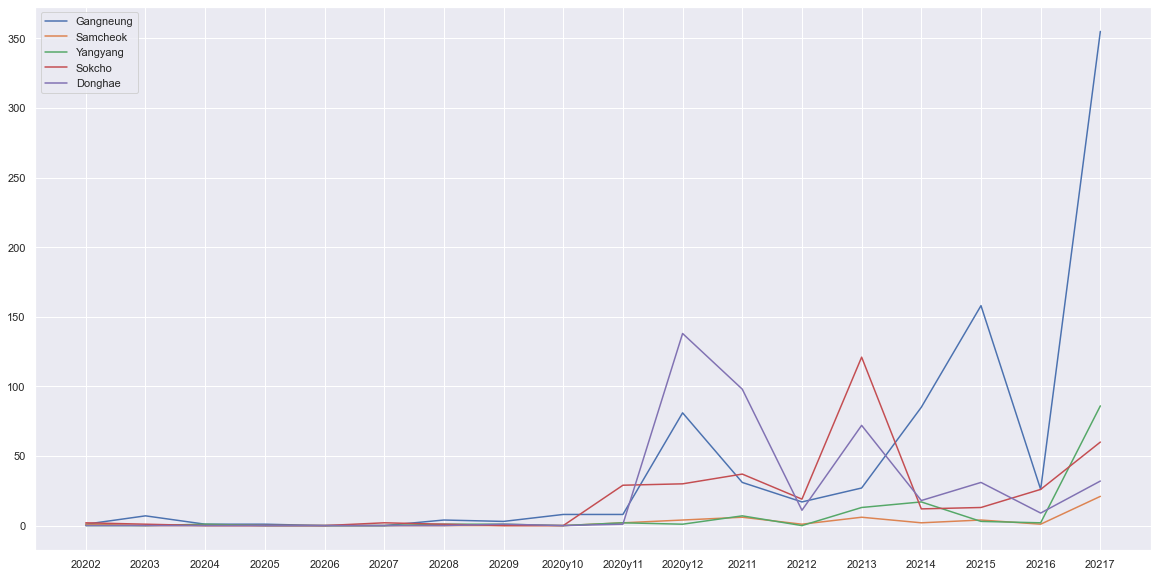

In [9]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, dashes=False)

코로나가 동해안에서도 많아지기 시작하고 여름철이 되자 확진자가  급증하는 모습이다.

# 동해안 톨게이트

In [10]:
import folium
from folium import Marker

In [11]:
df = pd.read_csv('TG_LH2.csv', encoding='utf-8' )
df.head()

,톨게이트이름,위도,경도
0,속초,38.202412,128.520132
1,북양양,38.154770,128.580687
2,양양,38.071461,128.596845
3,하조대,38.030198,128.692482
4,남양양,37.918056,128.796002


구글 지도에서 동해안으로 들어오는 톨게이트 위도와 경도를 가져왔다.

In [12]:
lat = df['위도'].mean()
long = df['경도'].mean()
center = [lat, long]

map = folium.Map(loacation = center, 
                 zoom_start = 1000,
                 max_bounds = True,
                 min_zoom = 9,
                 min_lat = 37,
                 max_lat = 39,
                 min_lon = 129,
                 max_lon = 130)


for idx,row in df.iterrows():
    Marker([row['위도'],row['경도']]).add_to(map)

map

# 월별 톨게이트 교통량

In [13]:
df = pd.read_csv('tollgate.csv', encoding='cp949')

In [14]:
df.head()

,date,name,inout,tcshipass,check
0,20200101,강릉,0,1,3112
1,20200101,강릉,0,2,13047
2,20200101,강릉,1,1,3996
3,20200101,강릉,1,2,16595
4,20200101,근덕,0,1,654


In [15]:
df.tail()

,date,name,inout,tcshipass,check
87473,20210630,홍천,1,2,6059
87474,20210630,횡성,0,1,601
87475,20210630,횡성,0,2,3302
87476,20210630,횡성,1,1,650
87477,20210630,횡성,1,2,3081


In [16]:
df = df.fillna(0)
df.head()

,date,name,inout,tcshipass,check
0,20200101,강릉,0,1,3112
1,20200101,강릉,0,2,13047
2,20200101,강릉,1,1,3996
3,20200101,강릉,1,2,16595
4,20200101,근덕,0,1,654


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87478 entries, 0 to 87477
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       87478 non-null  object
 1   name       87478 non-null  object
 2   inout      87478 non-null  object
 3   tcshipass  87478 non-null  object
 4   check      87478 non-null  object
dtypes: object(5)
memory usage: 3.3+ MB


In [18]:
df = df[df['inout'] == "0"]
df['check'] = df['check'].astype(int)
df['date'] = df['date'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43249 entries, 0 to 87475
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       43249 non-null  int32 
 1   name       43249 non-null  object
 2   inout      43249 non-null  object
 3   tcshipass  43249 non-null  object
 4   check      43249 non-null  int32 
dtypes: int32(2), object(3)
memory usage: 1.6+ MB


In [19]:
df.index = range(43249)
df

,date,name,inout,tcshipass,check
0,20200101,강릉,0,1,3112
1,20200101,강릉,0,2,13047
2,20200101,근덕,0,1,654
3,20200101,근덕,0,2,4063
4,20200101,남강릉,0,1,1047
...,...,...,...,...,...
43244,20210630,하조대,0,2,2395
43245,20210630,홍천,0,1,1149
43246,20210630,홍천,0,2,6272
43247,20210630,횡성,0,1,601


In [20]:
starts = [20200101, 20200201,20200301,20200401,20200501,20200601,20200701,20200801,20200901, 20201001,20201101,20201201,20210101,20210201 ,20210301, 20210401, 20210501, 20210601]
ends = [20200131, 20200229, 20200331,20200430,20200531,20200630,20200731,20200831,20200930,20201031,20201130,20201231,20210131,20210228, 20210331, 20210430, 20210531, 20210630]
names = ["강릉", "속초", "북양양", "양양", "남양양", "북강릉", "남강릉", "옥계", "망상", "동해", "삼척", "근덕", "하조대"]

In [21]:
# 일자별 -> 월별 함수 
def SplitByMonth(tollgatedata, name):
    month = 1
    for start, end in zip(starts, ends):
        startdate = tollgatedata['date'] >= start
        enddate = tollgatedata['date'] <= end
        place = tollgatedata['name'] == name
        datasum = tollgatedata[startdate & enddate & place]
        datasum = datasum['check'].sum()
        sbm.append(datasum)
        month += 1

In [22]:
sbm = []
for name in names:
    SplitByMonth(df, name)

In [23]:
len(sbm)

234

In [24]:
gangneung = sbm[0:18]
sokcho = sbm[18:36]
Nyangyang= sbm[36:54]
yangyang = sbm[54:72]
Syangyang = sbm[72:90]
Ngangneung = sbm[90:108]
Sgangneung = sbm[108:126]
okgye = sbm[126:144]
mangsang = sbm[144:162]
donghae = sbm[162:180]
samchuk = sbm[180:198]
geunduk = sbm[198:216]
hajodae = sbm[216:234] 

In [25]:
box = {"Gangneung":gangneung, "Ngangneung":Ngangneung, "Sgangneung":Sgangneung, 
       "yangyang":yangyang, "Nyangyang":Nyangyang, "Syangyang":Syangyang,
       "donghae":donghae, "samchuk":samchuk, "sokcho":sokcho,
       "okgye":okgye, "geunduk":geunduk, "mangsang":mangsang,
       "hajodae":hajodae
      }

bf = pd.DataFrame(box)
bf.index = ["2020-1", "2020-2", "2020-3", "2020-4", "2020-5",
           "2020-6", "2020-7", "2020-8", "2020-9", "2020-10",
           "2020-11", "2020-12", "2021-1", "2021-2", "2021-3",
           "2021-4", "2021-5", "2021-6"]

bf

,Gangneung,Ngangneung,Sgangneung,yangyang,Nyangyang,Syangyang,donghae,samchuk,sokcho,okgye,geunduk,mangsang,hajodae
2020-1,375957,179262,103462,110775,115622,69163,196391,100292,167697,62200,109902,91703,78333
2020-2,299459,136697,80163,87625,88895,50751,155703,75285,123874,46062,75614,66148,58973
2020-3,306683,146120,79291,106052,94740,56674,155944,75469,130322,51901,79022,67388,64126
2020-4,330271,155578,87386,107806,99896,60649,170930,83519,141357,54802,90912,72814,69082
2020-5,397892,187591,101998,138342,125676,78456,201815,100556,180806,64434,109261,87754,95512
2020-6,389162,193940,99353,292236,127892,81630,200479,100075,184199,64399,106948,85883,100773
2020-7,404621,205652,101324,145717,139689,86659,204612,103294,208505,66371,116256,87565,113971
2020-8,452293,235591,111588,176455,167458,108315,222126,116227,262569,81672,156570,100776,149071
2020-9,346889,165377,91652,115960,108353,63032,181326,91368,157424,58367,100803,75282,87852
2020-10,397402,203279,100825,162072,153101,86584,205111,105744,201695,66258,120916,87086,109351


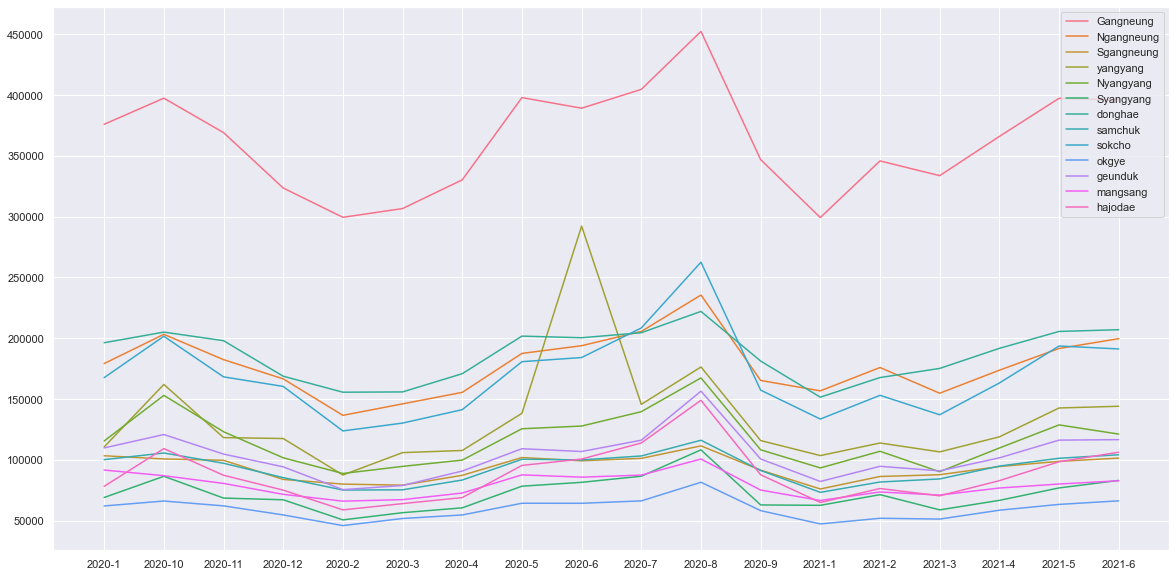

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(data=bf, dashes=False)

작년 동해안 톨게이트를 보면 확실히 대체로 7-8월이 증가하고있다.

# 결론

여름철 동해안으로 오는 교통량이 증가하고 확진자 수 급증으로 인해 해결책이 필요하다.

“혼잡도 신호등＂이라는 서비스 홍보가 잘 된다면 이용객들의 해수욕장 입장을 분산 시켜 
안전한 피서를 즐길 수 있을 것이다.

https://tournmaster.com/seantour_map/travel/beach/gangwon.do

이러한 서비스가 해수욕장 뿐만 아니라 다양한 관광지에 활용되면 더 안전한 해수욕장을 넘어서 안전한 관광을 즐길수 있을것이다.